# Capstone Project for Data Science - Tinyuka Session
## House Prices - Advanced Regression#


##Table of Contents

*   Introduction
*   Objecives
*   Data Collection and Preparation
*   Exploratory Data Analysis (EDA)
*   Feature Engineering
*   Model Training and Evaluation
*   Model Interpretation and Reporting








   




##**Introduction**

The real estate market is a complex and dynamic environment where numerous factors influence property values. Accurately predicting house prices is crucial for various stakeholders, including buyers, sellers, investors, and policymakers. With the advent of advanced data science techniques and the availability of rich datasets, it is now possible to develop predictive models that can estimate house prices based on various property features.

In this capstone project, I aim to leverage data science and machine learning methodologies to build a model that can predict house prices with high accuracy. The project will involve a comprehensive approach, including data cleaning, exploratory data analysis (EDA), feature engineering, model training, evaluation, and interpretation. By the end of this project, I hope to create a predictive model that not only provides accurate price estimates but also offers insights into the key factors driving house prices.

###Objectives
The project’s objective is to build a  machine learning model for predicting house prices. This involves data cleaning, exploratory data analysis, feature engineering, and model training. The aim is to deliver a model that reliably forecasts property values, evaluates performance against specific metrics, and provides actionable insights for stakeholders in the real estate market

###Problem Statement
Accurate house price prediction is critical for real estate decision-making. This project focuses on creating a machine learning model to estimate house prices from property feature data. By employing data science techniques, the goal is to deliver a reliable predictive tool, addressing real-world challenges in pricing decisions with a focus on model accuracy and practical application.

###Methodology


##Data Collection and Preparation

### 1.1 Download Dataset

The dataset is the 'House Prices - Advanced Regression Techniques' Dataset from kaggle and it contains various features describing houses in Ames, Iowa, including sales price, location, and other information.

Overview of the dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Data description: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
# Importing essential libraries for data analysis and machine learning

import pandas as pd  #for data manipulation and analysis, including data cleaning and transformation
import numpy as np  #for numerical computations, handling arrays, and mathematical operations
import matplotlib.pyplot as plt #for creating visualizations
import seaborn as sns #for statistical data visualization
from scipy import stats #for scientific and technical computing
from scipy.stats import norm # for data normalization

# Scikit-learn: Machine learning library that includes tools for data preprocessing, model selection, and evaluation
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numerical format
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For creating and using linear regression models
from sklearn.tree import DecisionTreeRegressor  # For creating and using decision tree models
from sklearn.ensemble import RandomForestRegressor  # For creating and using random forest models
from sklearn.ensemble import GradientBoostingRegressor  # For creating and using gradient boosting models
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.linear_model import LogisticRegression  # For creating and using logistic regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating model performance
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search

# Ensure that Matplotlib plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Set Pandas display options to show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Suppress warnings to avoid cluttering the output with warnings messages
import warnings
warnings.filterwarnings('ignore')


###1.2 Load Dataset

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
#Inspect the first few rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Check all column names
train_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Drop id column as it is not necessary for model training.

train_df = train_df.drop('Id', axis=1)
train_df.head(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
# Check unique values for categorical columns in the DataFrame
for col in train_df.select_dtypes(include='object').columns:
    print(col)
    print(train_df[col].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd'

### 1.3 Handling Missing Values

In [8]:
#Inspect the types of feature columns and null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# Calculate percentage of missing values for each column
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Sort and show missing percentages greater than 0
missing_percentage[missing_percentage > 0].sort_values(ascending=False)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [10]:
# Drop columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
train_df = train_df.drop(columns=columns_to_drop)


*Dropping columns with more than 50% missing values helps in maintaining data quality, enhancing model performance, and simplifying the data preprocessing workflow. It ensures that the features used in the model are reliable and meaningful, which is crucial for building effective predictive models*

*For columns with less than 50% missing values are handled by filling the missing values with an appropiate value that would represent the distribution of the column*

In [11]:

# FirePlace Quality (>47% missing values)


# Check for contents 'FireplaceQu' column
print(train_df['FireplaceQu'].unique())

print(train_df['FireplaceQu'].value_counts())

#Fill missing values of fireplace quality with 'NA'

train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('NA')
print(train_df['FireplaceQu'].value_counts())

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
FireplaceQu
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


In [12]:
#LotFrontage (>17% missing values)

# Group by 'Neighborhood' and calculate the median 'LotFrontage' for each group
neighborhood_medians = train_df.groupby('Neighborhood')['LotFrontage'].median()
neighborhood_medians


Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

 *For Lotfrontage the missing values are filled with the median values of missing values based on the median LotFrontage within the same neighborhood.*

In [13]:
# Define a function to fill missing values in 'LotFrontage'
def fill_lotfrontage(row):
    if pd.isnull(row['LotFrontage']):
        return neighborhood_medians[row['Neighborhood']]
    else:
        return row['LotFrontage']

# Apply the function to fill missing 'LotFrontage' values
train_df['LotFrontage'] = train_df.apply(fill_lotfrontage, axis=1)

# Verify that there are no missing values in 'LotFrontage'
print(train_df['LotFrontage'].isnull().sum())

0


In [14]:
#GarageType, GarageFinish, GarageQual,GarageCond And GarageYrBlt (>5% Missing values)

In [15]:
# Check for contents in garage features
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']
for feature in garage_features:
    print(f"Unique values in {feature}: {train_df[feature].unique()}")


Unique values in GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Unique values in GarageFinish: ['RFn' 'Unf' 'Fin' nan]
Unique values in GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Unique values in GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Unique values in GarageYrBlt: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


In [16]:
# For GarageType, GarageFinish, GarageQual and GarageCond replace missing data with 'NA'
for gar_col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_df[gar_col] = train_df[gar_col].fillna('NA')


*For GarageType, GarageFinish, GarageQual and GarageCond missing values are filled with 'NA' meaninng 'no garage'. And GarageYrBlt, values are filled with '0'*

In [17]:
# For GarageYrBlt, fill missing values with 0
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)


In [18]:
# Check for missing values in garage features
missing_garage_values = train_df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']].isnull().sum()
print(missing_garage_values)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
dtype: int64


In [19]:
 #BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual (>2% mising values)

*Similartly for BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual missing values are filled with 'NA' meaninng 'no Basement'.*

In [20]:
# For BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual replace missing data with 'NA'
for bsm_col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train_df[bsm_col] = train_df[bsm_col].fillna('NA')


In [21]:
#MasVnrAea (>0.5%missing values)

*For MaVnrArea the column is dropped because the related column MasVnrType has already been dropped due to its large percentage of missing values. This means that for MasVnr Area a similarly large percentage will have the value of 0.*

In [22]:
# Calculate the percentage of rows with MasVnrArea equal to 0
percentage_zero = (train_df['MasVnrArea'] == 0).sum() / len(train_df) * 100
print(f"Percentage of rows with MasVnrArea equal to 0: {percentage_zero:.2f}%")


Percentage of rows with MasVnrArea equal to 0: 58.97%


In [23]:
# Drop the 'MasVnrArea' column
train_df = train_df.drop('MasVnrArea', axis=1)

In [24]:
#Electrical (>0.07% mising values)

*Electrical column missing values are filled with the most common(mode) type of electrical system.*

In [25]:
# Find the mode of 'Electrical'
mode_electrical = train_df['Electrical'].mode()[0]
print("Mode of Electrical column:", mode_electrical)

# Fill missing values in 'Electrical' with the mode
train_df['Electrical'] = train_df['Electrical'].fillna(mode_electrical)


Mode of Electrical column: SBrkr


*The mode is  SBrkr which is the Standard Circuit Breakers & Romex*





In [26]:
#Checking for missing values
# Calculate percentage of missing values
missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

# Sort and show missing percentages greater than 0
missing_percentage[missing_percentage > 0].sort_values(ascending=False)


Series([], dtype: float64)

*All missing values have been handled*

### 1.4 Data Cleaning

In [27]:
# Check for duplicates
duplicate_rows = train_df.duplicated()
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


*There are no duplicates in the dataset*

In [28]:
# Check for negative values in numerical columns
numerical_cols = train_df.select_dtypes(include=np.number).columns
negative_values = train_df[numerical_cols].lt(0).sum()

# Print columns with negative values and their counts
print("Columns with negative values:")
print(negative_values[negative_values > 0])


Columns with negative values:
Series([], dtype: int64)


*No negative values*

## Exploratory Data Analysis

### 2.1 Understanding the distributions

In [29]:
# Check the new data
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [30]:
# Get information about the DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [31]:
# Check the shape of the DataFrame
train_df.shape


(1460, 74)

In [32]:
# Summary statistics for numerical features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,70.199658,22.431902,21.0,60.00,70.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [33]:
# Summary for categorical features
train_df.describe(include=['O']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


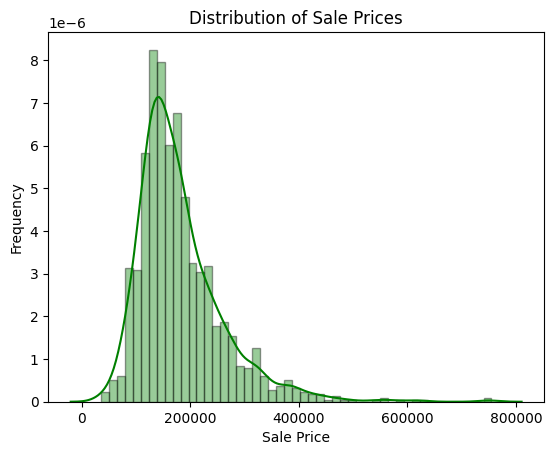

In [34]:
# Distribution of SalePrice
sns.distplot(train_df['SalePrice'], kde=True, hist_kws={'edgecolor':'black'}, color = 'g')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


*The Sale price is skewed to the right*

In [35]:
#Sales conditon
#Frequency table for SaleCondition to see what condition of houses getting sold
sale_condition_counts = train_df['SaleCondition'].value_counts()
sale_condition_counts

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [36]:
# Type of dwelling
#Frequency table for BldgType to see the building type of houses getting sold
bldgtype_counts = train_df['BldgType'].value_counts()
bldgtype_counts


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [37]:
# Neighborhoods
#Frequency table for Neighborhood for which neighbourhoods sells the most houses
neighborhood_counts = train_df['Neighborhood'].value_counts()
neighborhood_counts


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

*Most number of houses sold are in North Ames and College Creek*

In [38]:
# House style
#Frequency table for HouseStyle
house_style_counts = train_df['HouseStyle'].value_counts()
house_style_counts


HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

### 2.2 Visualization of Relationships

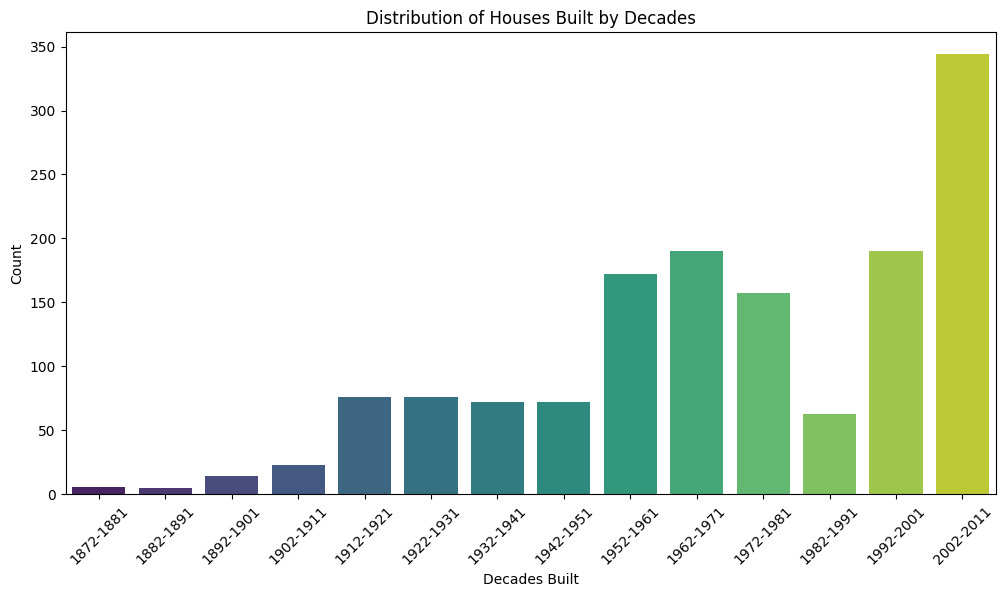

In [39]:
#Plot yearbuilt, group every 10 years together, show the ranges in the plot

# Create bins for year built
bins = range(train_df['YearBuilt'].min(), train_df['YearBuilt'].max() + 11, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]

# Cut the YearBuilt column into bins
pd.cut(train_df['YearBuilt'], bins=bins, labels=labels, right=False)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.cut(train_df['YearBuilt'], bins=bins, labels=labels, right=False) , data=train_df, palette = 'viridis')
plt.title('Distribution of Houses Built by Decades')
plt.xlabel('Decades Built')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


*More houses are sold from those built in the recent years*

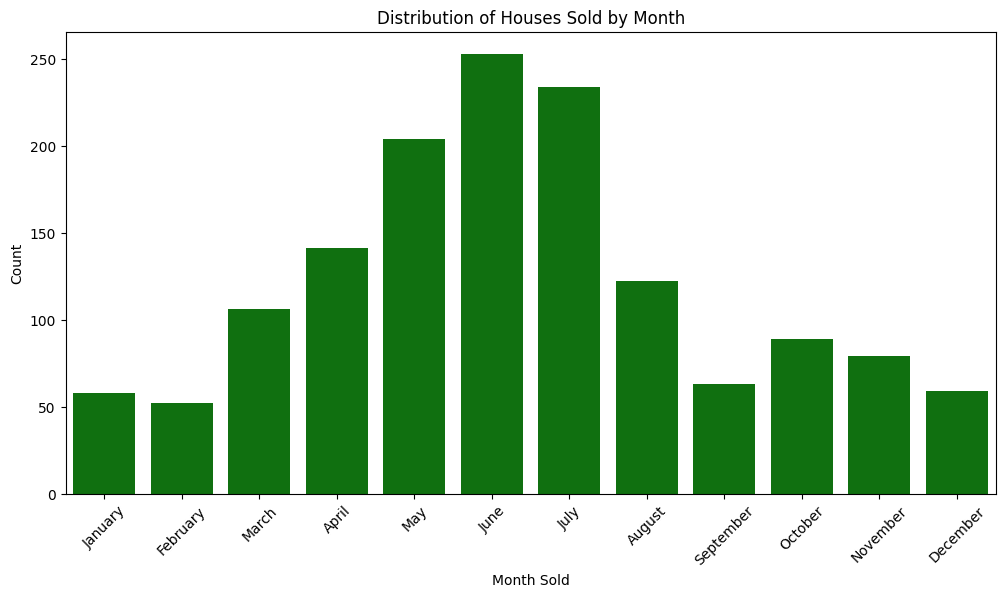

In [40]:
#Shows which months houses are sold the most
# Map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Create a new column with month names
train_df['MonthSold_Name'] = train_df['MoSold'].map(month_names)

# Plot the distribution of houses sold by month
plt.figure(figsize=(12, 6))
sns.countplot(x='MonthSold_Name', data=train_df, order=month_names.values(), color = 'g')
plt.title('Distribution of Houses Sold by Month')
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


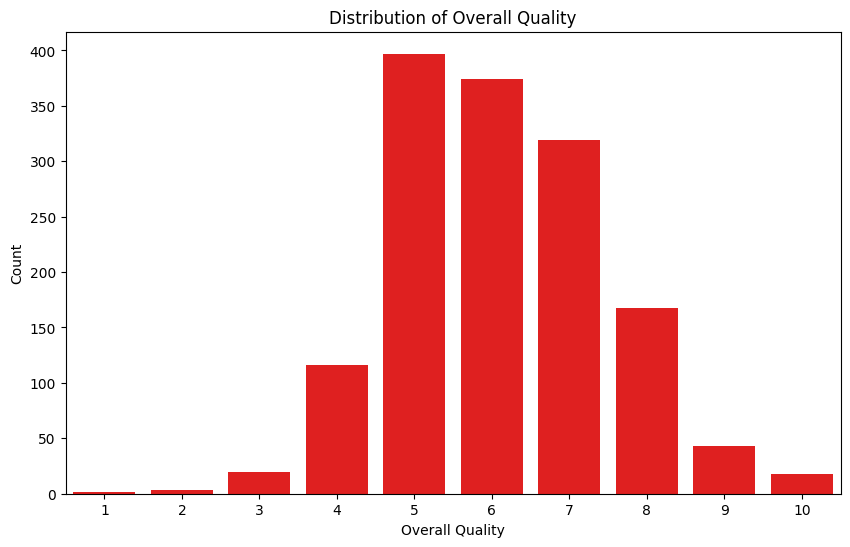

In [41]:
# Showing overall qaultiy of sold houses

plt.figure(figsize=(10, 6))
sns.countplot(x='OverallQual', data=train_df, color = 'r')
plt.title('Distribution of Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Count')
plt.show()


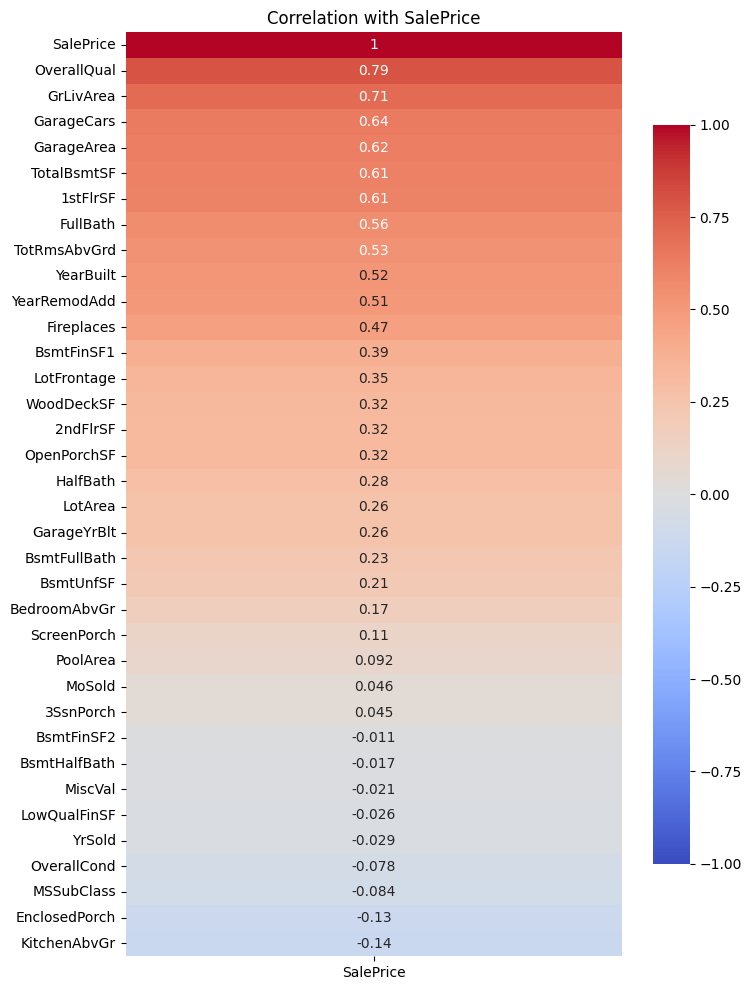

In [42]:
#Correlation heatmap to see the relationship between sales price and other features
# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation of each feature with SalePrice
corr_with_saleprice = train_df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

# Plot the heatmap for the correlation with SalePrice
plt.figure(figsize=(8, 12))
sns.heatmap(corr_with_saleprice.to_frame(), annot=True, cmap='coolwarm', cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Correlation with SalePrice')
plt.show()

Bivariate analysis to see the see the relationshp between sale price and highly correlated features

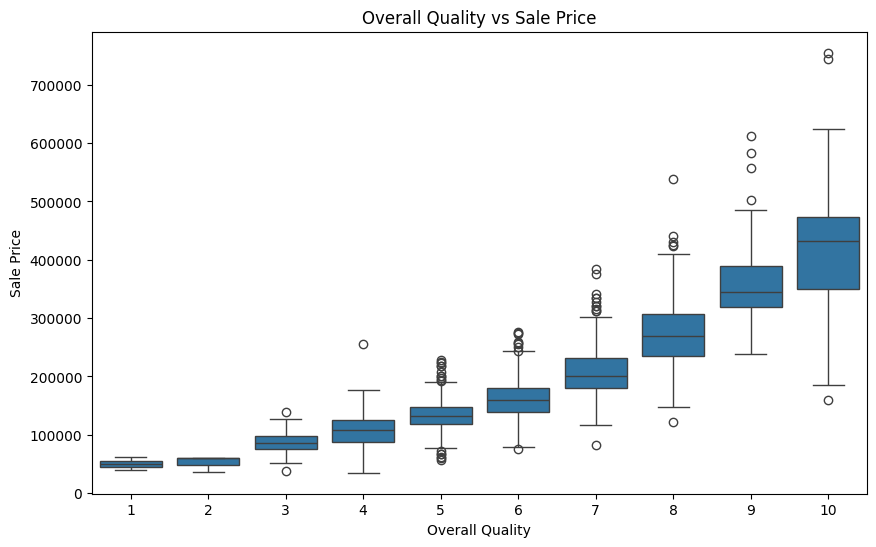

In [43]:
#Visualize overall quality and sales price

plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


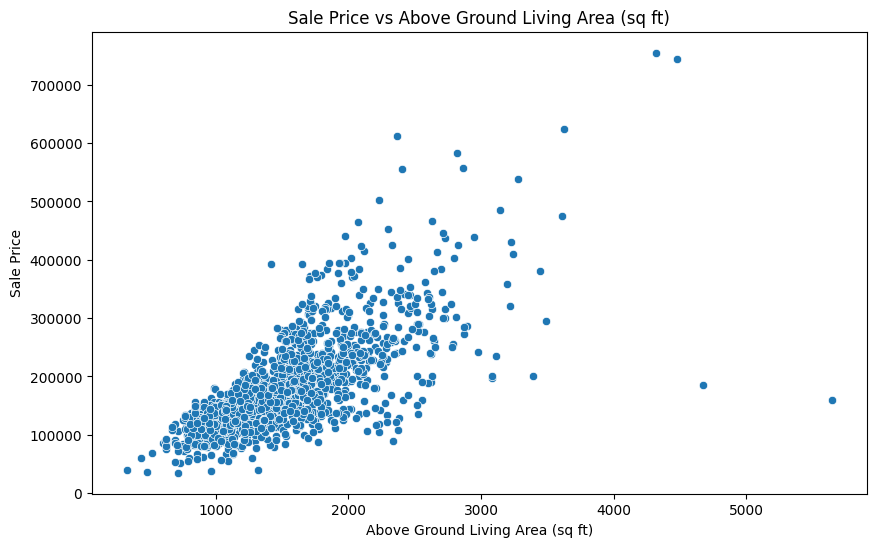

In [44]:
# visualize Above grade (ground) living area and sale price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Sale Price vs Above Ground Living Area (sq ft)')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


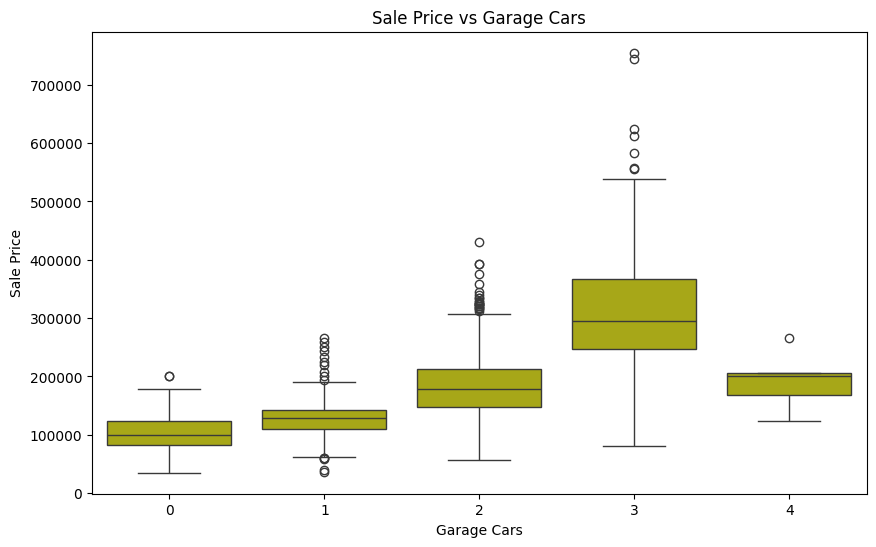

In [45]:
# prompt: visualizing sales price and garagecars

# visualize Garage Cars and sale price
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_df, color = 'y')
plt.title('Sale Price vs Garage Cars')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')
plt.show()


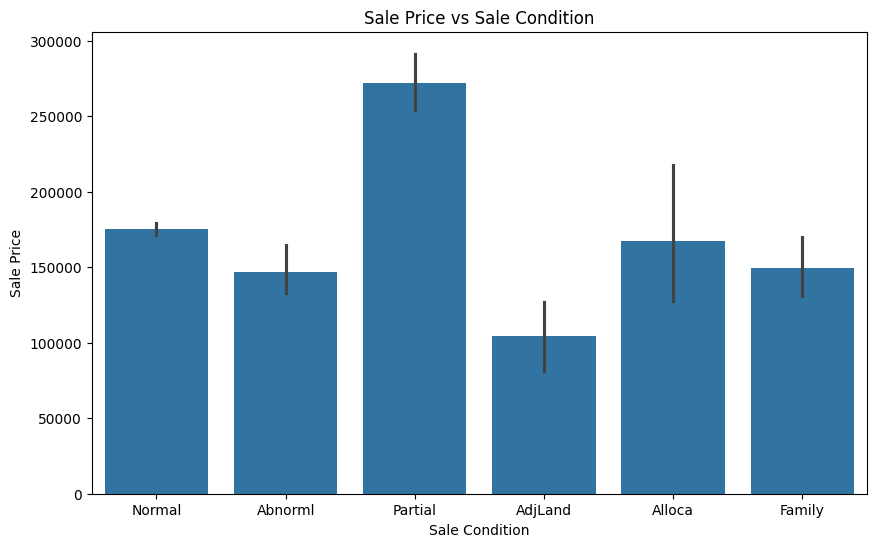

In [46]:
# visualizing sales price and sales condition

plt.figure(figsize=(10, 6))
sns.barplot(x='SaleCondition', y='SalePrice', data=train_df)
plt.title('Sale Price vs Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.show()


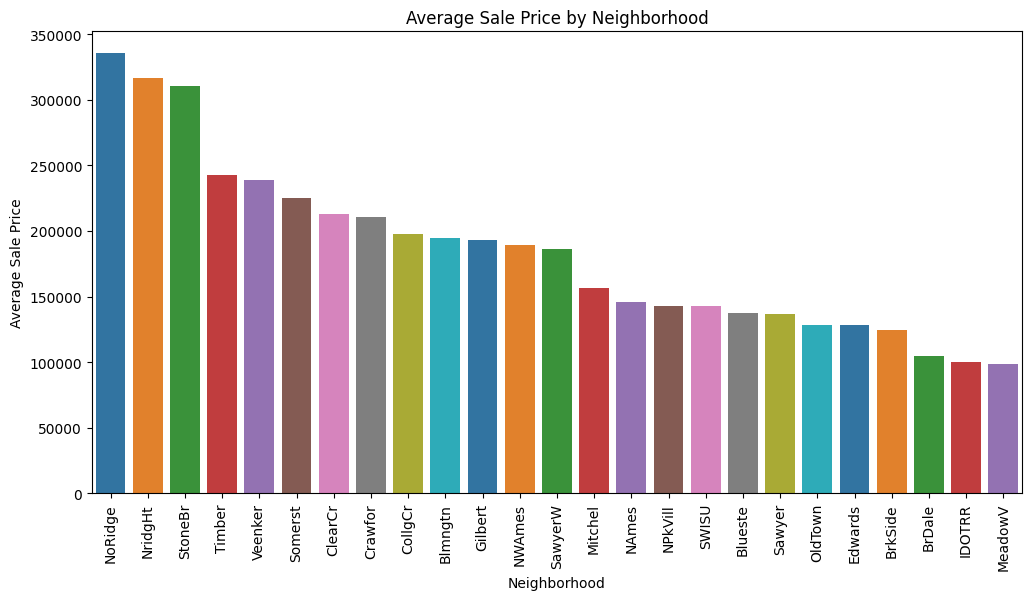

In [47]:
# Group the data by neighborhood and calculate the mean sale price
neighborhood_prices = train_df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values, palette='tab10')
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.show()


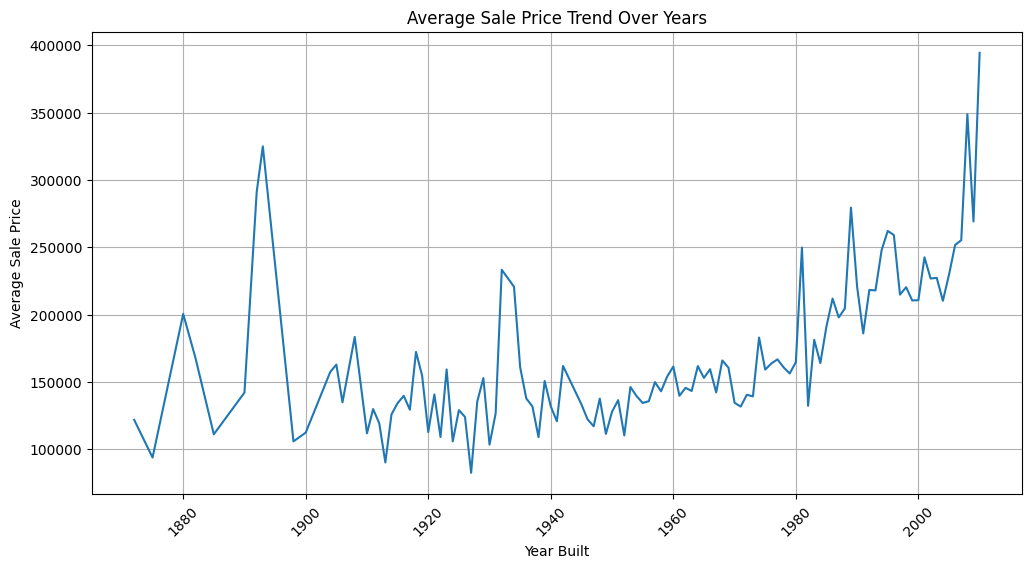

In [48]:
# Group the data by 'YearBuilt' and calculate the mean 'SalePrice' for each year
average_price_by_year = train_df.groupby('YearBuilt')['SalePrice'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values)
plt.title('Average Sale Price Trend Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


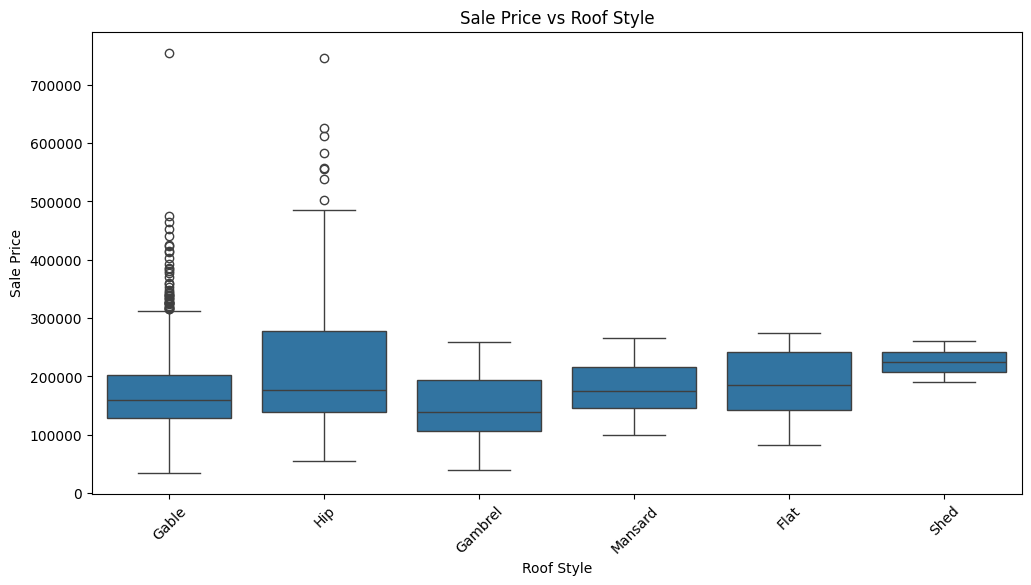

In [49]:
# Sales price and roof  type

plt.figure(figsize=(12, 6))
sns.boxplot(x='RoofStyle', y='SalePrice', data=train_df)
plt.title('Sale Price vs Roof Style')
plt.xlabel('Roof Style')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()


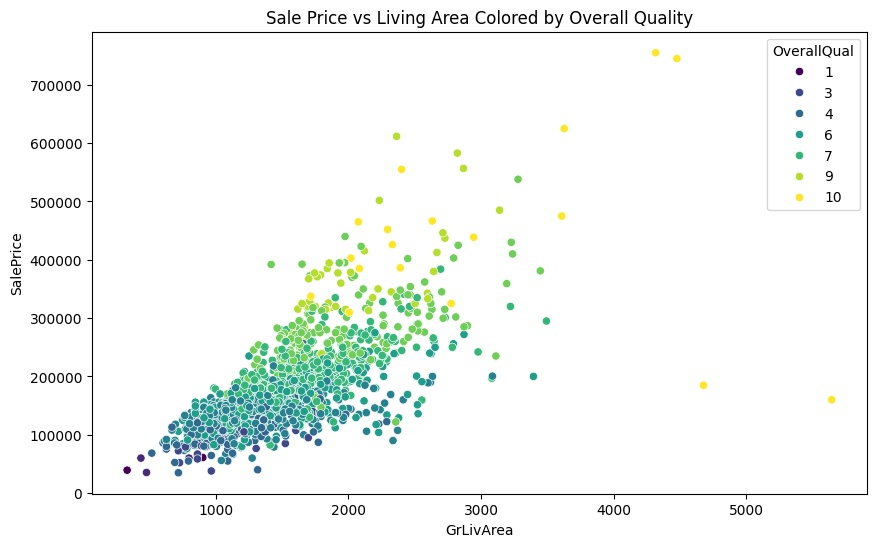

In [50]:
# Scatter plot of GrLivArea vs. SalePrice also showing above ground living area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis', data=train_df)
plt.title('Sale Price vs Living Area Colored by Overall Quality')
plt.show()

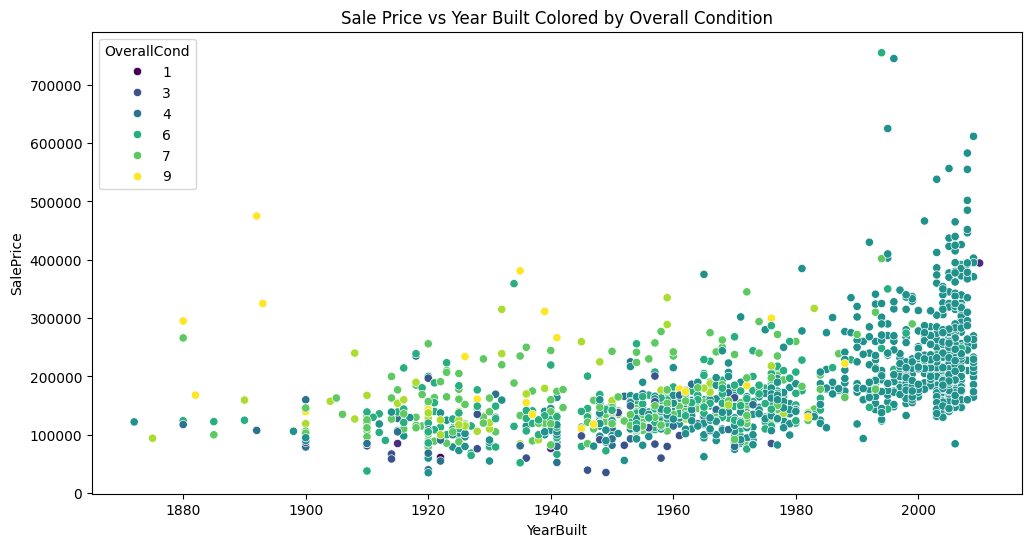

In [51]:
# sales price, year sold and overall condition
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='OverallCond', palette='viridis', data=train_df)
plt.title('Sale Price vs Year Built Colored by Overall Condition')
plt.show()


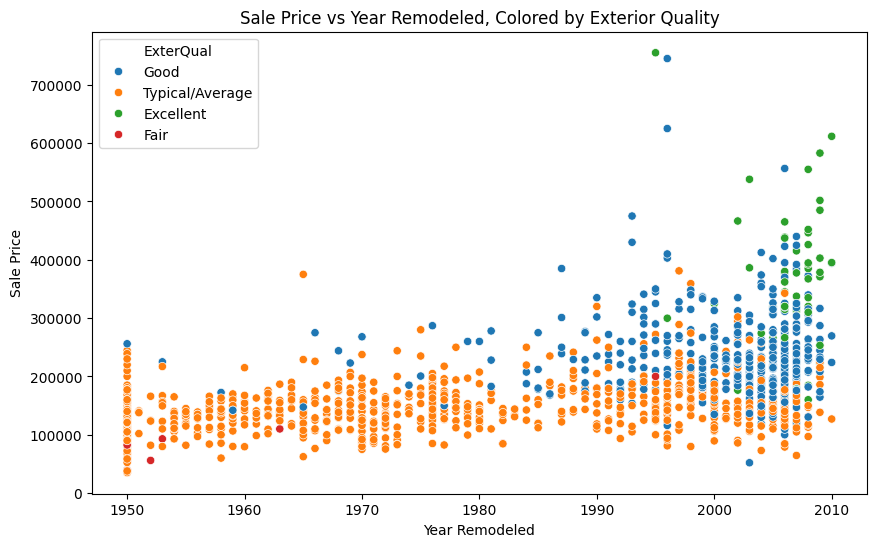

In [52]:
#sales price, year remodeled, exterior quality

exterQual_mapping = {
    'Ex': 'Excellent',
    'Gd': 'Good',
    'TA': 'Typical/Average',
    'Fa': 'Fair',
    'Po': 'Poor'
}

# Map the 'ExterQual' values to their corresponding descriptions
train_df['ExterQual'] = train_df['ExterQual'].map(exterQual_mapping)

# Create a scatter plot of SalePrice vs YearRemodAdd, colored by ExterQual
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', hue='ExterQual', data=train_df)
plt.title('Sale Price vs Year Remodeled, Colored by Exterior Quality')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.show()


###2.3 Handling Outliers

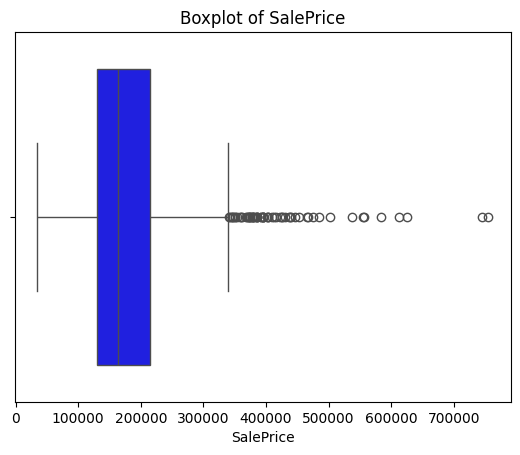

In [53]:
# Boxplot to visualize outliers in SalePrice
sns.boxplot(x=train_df['SalePrice'], color = 'b')
plt.title('Boxplot of SalePrice')
plt.show()


*There are a number of outliers in the dataset, but this represents the realism of  luxurious, large and very expensive houses and mansions. They are not errors as can be also seen that there are no outliers on the lower end. The outliers are left in the dataset to represent real life scenario*

##Feature Engineering

### 3.1 Creation of new features

In [54]:
# Creating New Features

# Whether the house has a pool or not
train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Whether the house has a second floor or not
train_df['Has2ndFloor'] = train_df['2ndFlrSF'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Whether the house has a garage or not
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Whether the house has a fireplace or not
train_df['HasFireplace'] = train_df['Fireplaces'].apply(lambda x: 'Yes' if x > 0 else 'No')

# Age of the house at the time of sale
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Years since the house was remodeled
train_df['YearsSinceRemodel'] = train_df['YrSold'] - train_df['YearRemodAdd']

#Calculating Average Roomsize
train_df['AvgRoomArea'] = train_df['GrLivArea'] / train_df['TotRmsAbvGrd']



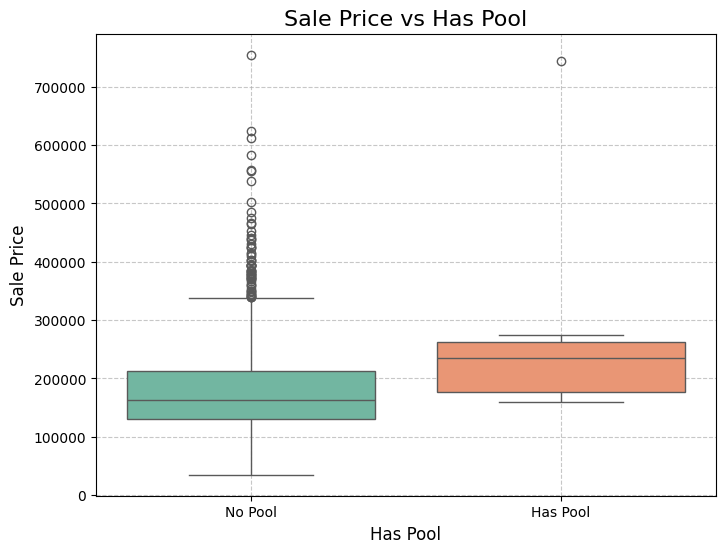

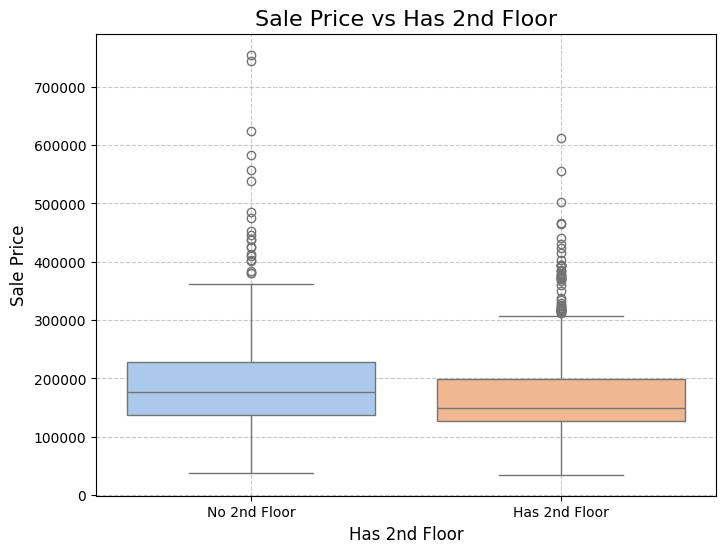

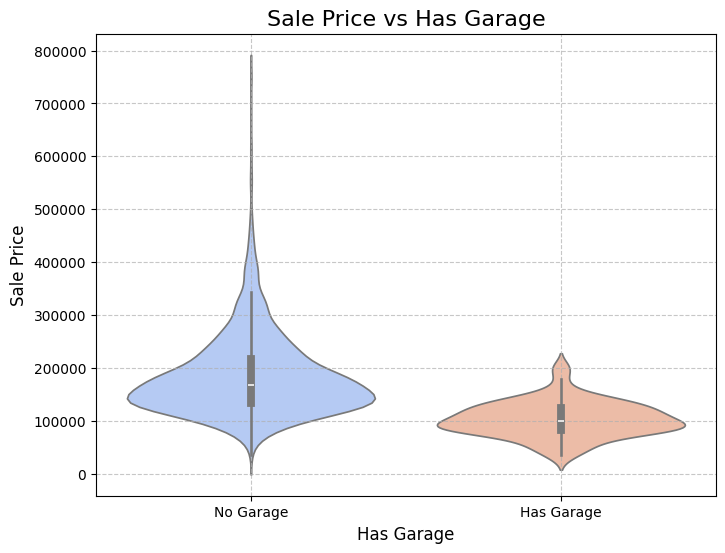

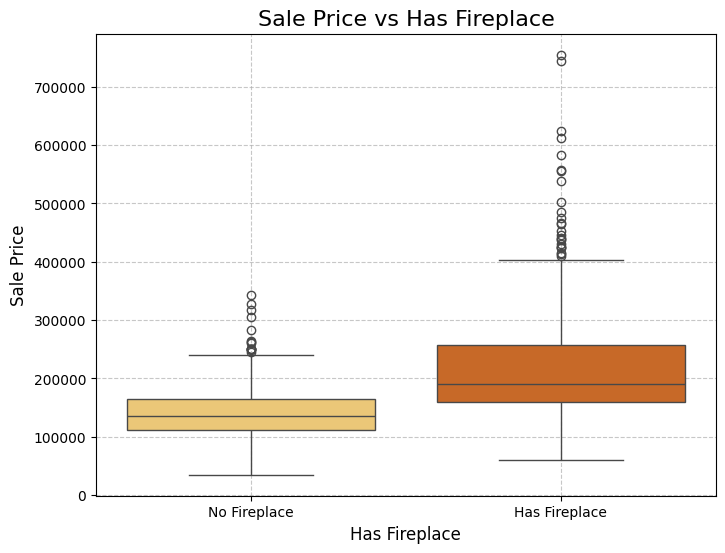

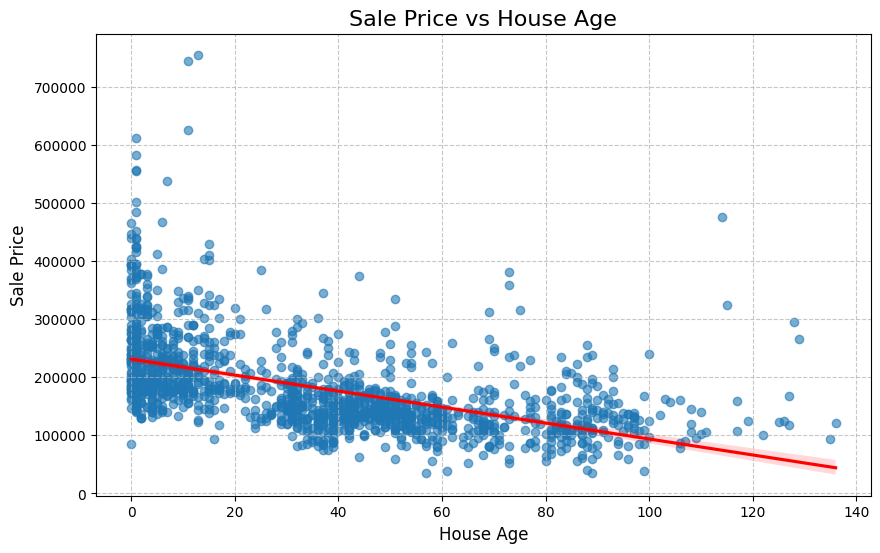

In [55]:
# Relationship between HasPool and SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='HasPool', y='SalePrice', data=train_df, palette='Set2')
plt.title('Sale Price vs Has Pool', fontsize=16)
plt.xlabel('Has Pool', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xticks([0, 1], ['No Pool', 'Has Pool'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Relationship between Has2ndFloor and SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has2ndFloor', y='SalePrice', data=train_df, palette='pastel')
plt.title('Sale Price vs Has 2nd Floor', fontsize=16)
plt.xlabel('Has 2nd Floor', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xticks([0, 1], ['No 2nd Floor', 'Has 2nd Floor'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Relationship between HasGarage and SalePrice
plt.figure(figsize=(8, 6))
sns.violinplot(x='HasGarage', y='SalePrice', data=train_df, palette='coolwarm')
plt.title('Sale Price vs Has Garage', fontsize=16)
plt.xlabel('Has Garage', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xticks([0, 1], ['No Garage', 'Has Garage'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Relationship between HasFireplace and SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='HasFireplace', y='SalePrice', data=train_df, palette='YlOrBr')
plt.title('Sale Price vs Has Fireplace', fontsize=16)
plt.xlabel('Has Fireplace', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.xticks([0, 1], ['No Fireplace', 'Has Fireplace'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Relationship between HouseAge and SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x='HouseAge', y='SalePrice', data=train_df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Sale Price vs House Age', fontsize=16)
plt.xlabel('House Age', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


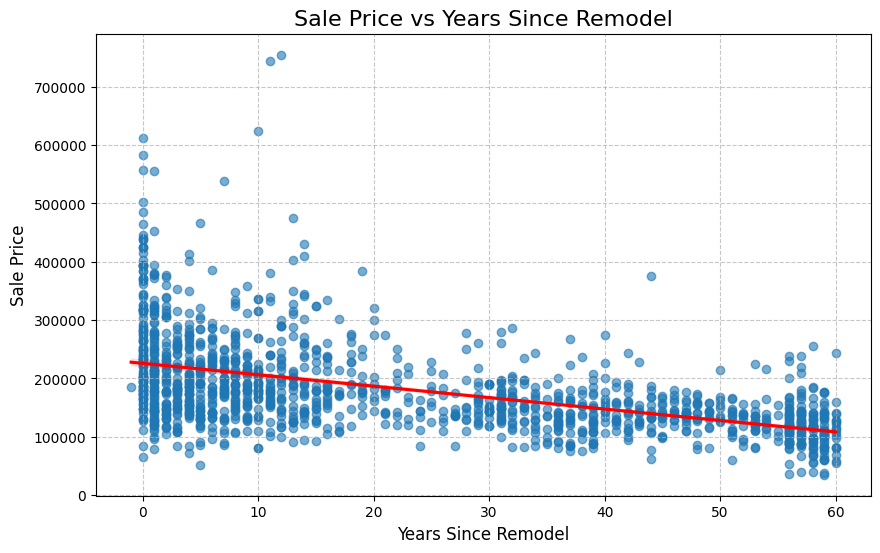

In [56]:

# Relationship between YearsSinceRemodel and SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x='YearsSinceRemodel', y='SalePrice', data=train_df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Sale Price vs Years Since Remodel', fontsize=16)
plt.xlabel('Years Since Remodel', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


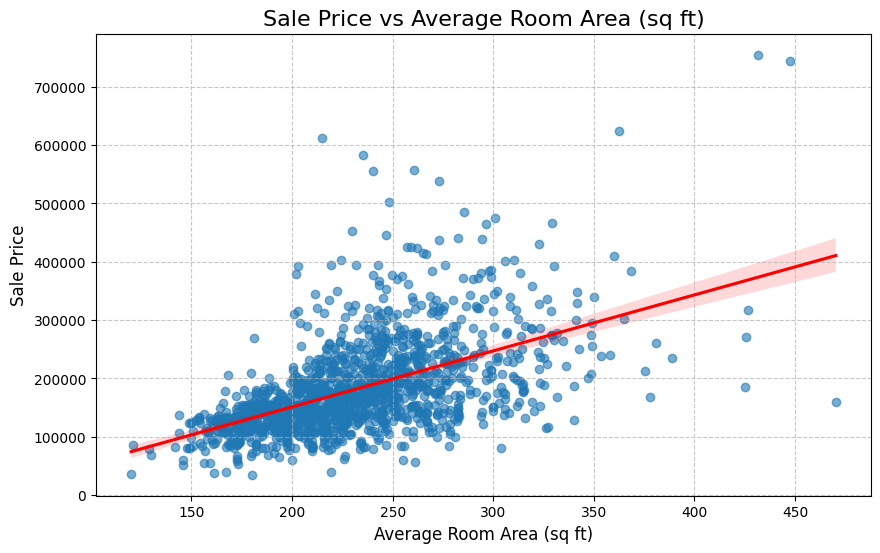

In [57]:
# prompt: plot sales price and room area with  square feet as unit

# Relationship between AvgRoomArea and SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x='AvgRoomArea', y='SalePrice', data=train_df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Sale Price vs Average Room Area (sq ft)', fontsize=16)
plt.xlabel('Average Room Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [58]:

#Selecting features that infuence the sales price and would be used for the model
sel_features = train_df[['SalePrice' ,'SaleCondition', 'Neighborhood', 'Electrical','HouseStyle', 'YearBuilt', 'MonthSold_Name',
                     'OverallQual', 'GarageCars', 'GarageArea',
                     'TotalBsmtSF', '1stFlrSF', 'AvgRoomArea', 'YearsSinceRemodel',
                     'GrLivArea', 'RoofStyle', 'OverallCond', 'YearRemodAdd', 'ExterQual', 'BldgType',
                      'Has2ndFloor', 'HasGarage', 'HasFireplace', 'HouseAge']]

sel_features.head()

,SalePrice,SaleCondition,Neighborhood,Electrical,HouseStyle,YearBuilt,MonthSold_Name,OverallQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,AvgRoomArea,YearsSinceRemodel,GrLivArea,RoofStyle,OverallCond,YearRemodAdd,ExterQual,BldgType,Has2ndFloor,HasGarage,HasFireplace,HouseAge
0,208500,Normal,CollgCr,SBrkr,2Story,2003,February,7,2,548,856,856,213.750000,5,1710,Gable,5,2003,Good,1Fam,Yes,Yes,No,5
1,181500,Normal,Veenker,SBrkr,1Story,1976,May,6,2,460,1262,1262,210.333333,31,1262,Gable,8,1976,Typical/Average,1Fam,No,Yes,Yes,31
2,223500,Normal,CollgCr,SBrkr,2Story,2001,September,7,2,608,920,920,297.666667,6,1786,Gable,5,2002,Good,1Fam,Yes,Yes,Yes,7
3,140000,Abnorml,Crawfor,SBrkr,2Story,1915,February,7,3,642,756,961,245.285714,36,1717,Gable,5,1970,Typical/Average,1Fam,Yes,Yes,Yes,91
4,250000,Normal,NoRidge,SBrkr,2Story,2000,December,8,3,836,1145,1145,244.222222,8,2198,Gable,5,2000,Good,1Fam,Yes,Yes,Yes,8


In [59]:
# categorical columns in selected features

# Get categorical columns
categorical_cols = sel_features.select_dtypes(include=['object'])

categorical_cols.head()


,SaleCondition,Neighborhood,Electrical,HouseStyle,MonthSold_Name,RoofStyle,ExterQual,BldgType,Has2ndFloor,HasGarage,HasFireplace
0,Normal,CollgCr,SBrkr,2Story,February,Gable,Good,1Fam,Yes,Yes,No
1,Normal,Veenker,SBrkr,1Story,May,Gable,Typical/Average,1Fam,No,Yes,Yes
2,Normal,CollgCr,SBrkr,2Story,September,Gable,Good,1Fam,Yes,Yes,Yes
3,Abnorml,Crawfor,SBrkr,2Story,February,Gable,Typical/Average,1Fam,Yes,Yes,Yes
4,Normal,NoRidge,SBrkr,2Story,December,Gable,Good,1Fam,Yes,Yes,Yes


In [60]:
# Select numerical features (excluding 'SalePrice')
numerical_cols = sel_features.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis=1)

numerical_cols.head()


,YearBuilt,OverallQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,AvgRoomArea,YearsSinceRemodel,GrLivArea,OverallCond,YearRemodAdd,HouseAge
0,2003,7,2,548,856,856,213.750000,5,1710,5,2003,5
1,1976,6,2,460,1262,1262,210.333333,31,1262,8,1976,31
2,2001,7,2,608,920,920,297.666667,6,1786,5,2002,7
3,1915,7,3,642,756,961,245.285714,36,1717,5,1970,91
4,2000,8,3,836,1145,1145,244.222222,8,2198,5,2000,8


### 3.2 Encoding of categorical variables

In [61]:
 # Encode categorical variables using Label Encoding techniiques
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    sel_features[col] = label_encoder.fit_transform(sel_features[col])

sel_features.head()


,SalePrice,SaleCondition,Neighborhood,Electrical,HouseStyle,YearBuilt,MonthSold_Name,OverallQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,AvgRoomArea,YearsSinceRemodel,GrLivArea,RoofStyle,OverallCond,YearRemodAdd,ExterQual,BldgType,Has2ndFloor,HasGarage,HasFireplace,HouseAge
0,208500,4,5,4,5,2003,3,7,2,548,856,856,213.750000,5,1710,1,5,2003,2,0,1,1,0,5
1,181500,4,24,4,2,1976,8,6,2,460,1262,1262,210.333333,31,1262,1,8,1976,3,0,0,1,1,31
2,223500,4,5,4,5,2001,11,7,2,608,920,920,297.666667,6,1786,1,5,2002,2,0,1,1,1,7
3,140000,0,6,4,5,1915,3,7,3,642,756,961,245.285714,36,1717,1,5,1970,3,0,1,1,1,91
4,250000,4,15,4,5,2000,2,8,3,836,1145,1145,244.222222,8,2198,1,5,2000,2,0,1,1,1,8


### 3.3 Standardization of numerical features

In [62]:
# Standardize numerical features.

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
sel_features[numerical_cols.columns] = scaler.fit_transform(sel_features[numerical_cols.columns])


##Model Training and Evaluation

### 4.1 Split the dataset into training and testing sets.

In [63]:
# Split the data into training and testing sets
X = sel_features.drop('SalePrice', axis=1)
y = sel_features['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  4.2 Selection of machine learning algorithms


The algorithms to be used include Linear Regression, Decision Tree regression, Random Forest regresion and Gradient Boosting machines

Linear Regression was chosen for its simplicity, interpretability, and efficiency. It gives a fundamental model for understanding the linear correlations between attributes and the objective variable (house prices). As a baseline model, it assists in determining whether more complicated models are required and establishes a performance standard.

Decision Tree Regression was chosen because of its capacity to handle nonlinear correlations and feature interactions. Its visual interpretability aids in learning how different features influence predictions. Decision trees are useful for capturing complicated patterns and feature interactions with minimal preprocessing.

Random Forest Regression expands on the Decision Tree by employing an ensemble approach that combines numerous decision trees to increase accuracy and reduce overfitting. This strategy improves model robustness and efficiency, especially for big datasets with multiple feature interactions. Random Forest also provides insights into feature importance, which is useful for determining which features have the most influence on house pricing.

Gradient Boosting Machines (GBM) are included because of their advanced boosting technique, which incrementally builds and refines models. GBM excels at dealing with complex nonlinear interactions and frequently outperforms other predictive models. It corrects for errors produced by prior models, resulting in very accurate forecasts. GBM's flexibility and capability make it an excellent choice for capturing complex patterns in real estate data.

### 4.3 Model training and evaluation

In [64]:
# Linear regression

# Initialize and train the Linear Regression model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = LR_model.predict(X_test)

# Evaluate the model with  RMSE, MAE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R-squared (R²): {:.4f}".format(r2))


Root Mean Squared Error (RMSE): 36546.2944
Mean Absolute Error (MAE): 22655.2700
R-squared (R²): 0.8259


In [65]:
# Decision Tree Regression

# Initialize and train the Decision Tree Regression model
DT_model = DecisionTreeRegressor(random_state=42)
DT_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = DT_model.predict(X_test)

# Evaluate the model  with  RMSE, MAE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R-squared (R²): {:.4f}".format(r2))


Decision Tree Regression:
Root Mean Squared Error (RMSE): 42026.8655
Mean Absolute Error (MAE): 26831.5377
R-squared (R²): 0.7697


In [66]:
# Random Forest Regression

# Initialize and train the Random Forest Regression model
RF_model = RandomForestRegressor(random_state=42)
RF_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_model.predict(X_test)

# Evaluate the model with RMSE, MAE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R-squared (R²): {:.4f}".format(r2))


Random Forest Regression:
Root Mean Squared Error (RMSE): 30896.6879
Mean Absolute Error (MAE): 18370.1007
R-squared (R²): 0.8755


In [67]:
# Gradient Boosting Machines (GBM)

# Initialize and train the Gradient Boosting Regression model
GBM_model = GradientBoostingRegressor(random_state=42)
GBM_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = GBM_model.predict(X_test)

# Evaluate the model with RMSE, MAE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Machines:")
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R-squared (R²): {:.4f}".format(r2))


Gradient Boosting Machines:
Root Mean Squared Error (RMSE): 29634.0266
Mean Absolute Error (MAE): 18095.1044
R-squared (R²): 0.8855


### 4.4 Hyperparameter tuning

In [68]:
# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DT_model, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Best Parameters and Best Score
best_estimator_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_

print('Best parameters for Decision Tree:', best_params_dt)
print('Best MSE score for Decision Tree:', best_score_dt)



Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE score for Decision Tree: 1447125874.761392


In [69]:
# Refit the Decision Tree model on the entire training dataset
best_estimator_dt.fit(X_train, y_train)

# Predict on the test set using the refitted model
y_pred_best_dt = best_estimator_dt.predict(X_test)

# Calculate metrics for the refitted model
rmse_best_dt = np.sqrt(mean_squared_error(y_test, y_pred_best_dt))
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print("Refitted Decision Tree Regression:")
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse_best_dt))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_best_dt))
print("R-squared (R²): {:.4f}".format(r2_best_dt))


Refitted Decision Tree Regression:
Root Mean Squared Error (RMSE): 37376.9292
Mean Absolute Error (MAE): 24174.4234
R-squared (R²): 0.8179


In [70]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RF_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Best Parameters and Best Score
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

print('Best parameters for Random Forest:', best_params_rf)
print('Best MSE score for Random Forest:', best_score_rf)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE score for Random Forest: 1024106432.4716864


In [71]:
# Refit the Random Forest model on the entire training dataset
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train, y_train)

# Predict on the test set using the refitted model
y_pred_best_rf = best_estimator_rf.predict(X_test)

# Calculate metrics for the refitted model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Refitted Random Forest Regression:")
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse_best_rf))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_best_rf))
print("R-squared (R²): {:.4f}".format(r2_best_rf))


Refitted Random Forest Regression:
Root Mean Squared Error (RMSE): 30188.2414
Mean Absolute Error (MAE): 18279.9670
R-squared (R²): 0.8812


In [72]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gbm = GridSearchCV(estimator=GBM_model, param_grid=param_grid_gbm, cv=5, scoring='neg_mean_squared_error')
grid_search_gbm.fit(X_train, y_train)

#Get the best parameters and the best score
best_params_gbm = grid_search_gbm.best_params_
best_score_gbm = -grid_search_gbm.best_score_

print('Best parameters for Gradient Boosting:', best_params_gbm)
print('Best MSE score for Gradient Boosting:', best_score_gbm)

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best MSE score for Gradient Boosting: 1029111577.5418475


In [73]:
# prompt: # Refit the  model on the entire training dataset
# and calculate metrics

# Refit the Gradient Boosting model on the entire training dataset
best_estimator_gbm = grid_search_gbm.best_estimator_
best_estimator_gbm.fit(X_train, y_train)

# Predict on the test set using the refitted model
y_pred_best_gbm = best_estimator_gbm.predict(X_test)

# Calculate metrics for the refitted model
rmse_best_gbm = np.sqrt(mean_squared_error(y_test, y_pred_best_gbm))
mae_best_gbm = mean_absolute_error(y_test, y_pred_best_gbm)
r2_best_gbm = r2_score(y_test, y_pred_best_gbm)

print("Refitted Gradient Boosting Machines:")
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse_best_gbm))
print("Mean Absolute Error (MAE): {:.4f}".format(mae_best_gbm))
print("R-squared (R²): {:.4f}".format(r2_best_gbm))


Refitted Gradient Boosting Machines:
Root Mean Squared Error (RMSE): 29202.1679
Mean Absolute Error (MAE): 17961.3266
R-squared (R²): 0.8888


In [74]:
# prompt: show a table with the results of the models

from tabulate import tabulate

# Create a list of dictionaries to store model results
results = [
    {"Model": "Linear Regression", "RMSE": rmse, "MAE": mae, "R²": r2},
    {"Model": "Decision Tree", "RMSE": rmse_best_dt, "MAE": mae_best_dt, "R²": r2_best_dt},
    {"Model": "Random Forest", "RMSE": rmse_best_rf, "MAE": mae_best_rf, "R²": r2_best_rf},
    {"Model": "Gradient Boosting", "RMSE": rmse_best_gbm, "MAE": mae_best_gbm, "R²": r2_best_gbm}
]

# Display the table using tabulate
table = tabulate(results, headers="keys", tablefmt="pipe")
print(table)


| Model             |    RMSE |     MAE |       R² |
|:------------------|--------:|--------:|---------:|
| Linear Regression | 29634   | 18095.1 | 0.88551  |
| Decision Tree     | 37376.9 | 24174.4 | 0.817865 |
| Random Forest     | 30188.2 | 18280   | 0.881188 |
| Gradient Boosting | 29202.2 | 17961.3 | 0.888823 |


*The best performing model can be seen to be Gradient boosting, due to the lowest RMSE and MAE, and the highest R² value, indicating it is the most accurate and consistent model for predicting house prices in this case.*

##Model Interpretation and Reporting

### 5.1 Critical features and visualization

              Feature    Importance
6         OverallQual  5.729278e-01
13          GrLivArea  1.548741e-01
9         TotalBsmtSF  5.305776e-02
10           1stFlrSF  4.437546e-02
1        Neighborhood  2.220138e-02
7          GarageCars  2.157510e-02
16       YearRemodAdd  1.967380e-02
8          GarageArea  1.964244e-02
22           HouseAge  1.794454e-02
11        AvgRoomArea  1.473613e-02
4           YearBuilt  1.158429e-02
12  YearsSinceRemodel  1.032588e-02
21       HasFireplace  8.523192e-03
15        OverallCond  7.942089e-03
17          ExterQual  6.026384e-03
5      MonthSold_Name  5.269979e-03
0       SaleCondition  2.896868e-03
18           BldgType  2.704769e-03
3          HouseStyle  2.042151e-03
14          RoofStyle  1.551345e-03
2          Electrical  1.130670e-04
19        Has2ndFloor  1.148452e-05
20          HasGarage  1.035286e-10


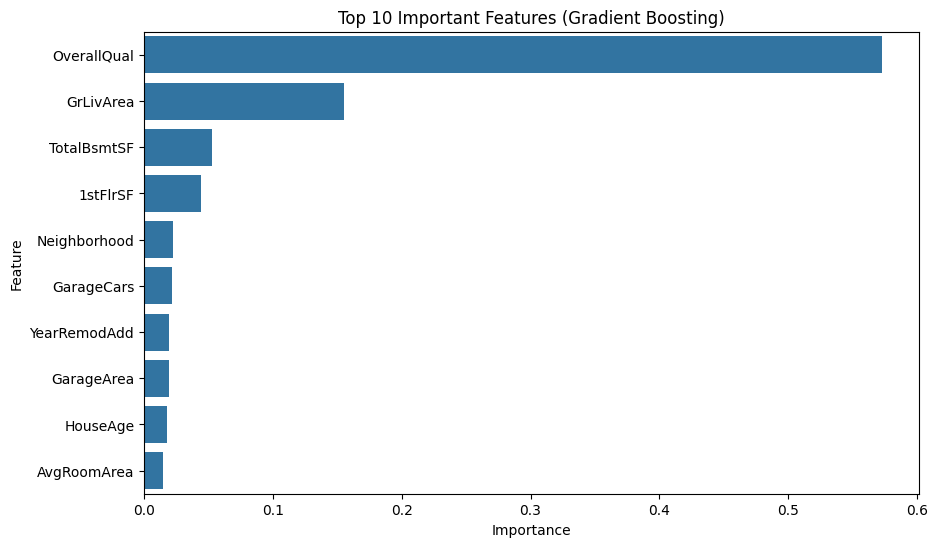

In [77]:
# Get feature importances from the best GBM model
feature_importances = best_estimator_gbm.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the top N important features
top_n = 10  # Set the number of top features to display
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title(f'Top {top_n} Important Features (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Critical Features:
-----------------
- OverallQual: This feature has an importance score of 0.5729, it is the largerst influencer of sale price.
    - OverallQual represents the overall material and finish quality of the house.
    - Higher values indicate better quality, which positively impacts sale price.
- GrLivArea: This feature has an importance score of 0.1549.
    - GrLivArea is the above ground living area square footage.
    - Larger living areas generally command higher prices.
Other features that influence the sale price include  
- TotalBsmtSF: importance score of 0.0444. 0.0531.
- 1stFlrSF: importance score of 0.0444.
- Neighborhood:  importance score of 0.0222.
- GarageCars: importance score of 0.0216.
- YearRemodAdd:importance score of 0.0197.
- GarageArea: importance score of 0.0196.
- HouseAge: importance score of 0.0179.
- AvgRoomArea: importance score of 0.0147.


Conclusion:
-----------
The analysis highlights the key factors influencing house prices.
This information can be used to make informed decisions regarding real estate investments.
For example, focusing on improving overall quality and increasing living area can lead to higher sale prices.